In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'train', shuffle=True
)
test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    'test', shuffle=False
)

labels = list(train_gen.class_indices.keys())
print(labels)

base = MobileNetV2(include_top=False, weights='imagenet')
base.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
out = Dense(5, activation='softmax')(x)

model = Model(inputs=base.input, outputs=out)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(train_gen, epochs = 5, validation_data=test_gen)

Found 5000 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']


/var/folders/m_/t9bvchbn17s8wyq474l6jjjr0000gn/T/ipykernel_86284/2011616246.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(include_top=False, weights='imagenet')


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.7006 - loss: 0.8009 - val_accuracy: 0.8000 - val_loss: 0.4560
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 345ms/step - accuracy: 0.8563 - loss: 0.4003 - val_accuracy: 0.8400 - val_loss: 0.3210
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 357ms/step - accuracy: 0.9035 - loss: 0.2802 - val_accuracy: 0.9000 - val_loss: 0.3218
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 370ms/step - accuracy: 0.9287 - loss: 0.2192 - val_accuracy: 0.9200 - val_loss: 0.2525
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 59s 376ms/step - accuracy: 0.9391 - loss: 0.1760 - val_accuracy: 0.9200 - val_loss: 0.1781


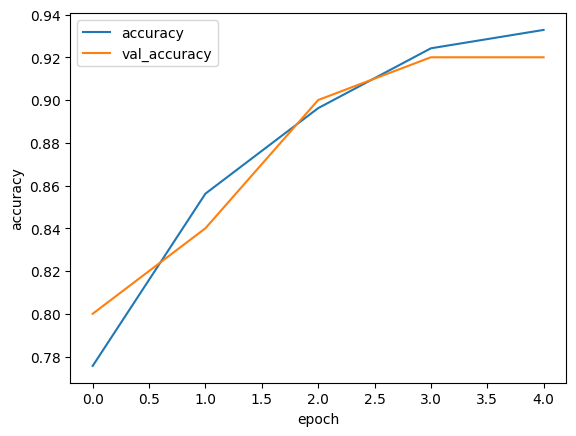

In [10]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      0.90      0.95        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91        10

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50

[[ 7  0  2  0  1]
 [ 0  9  0  0  1]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


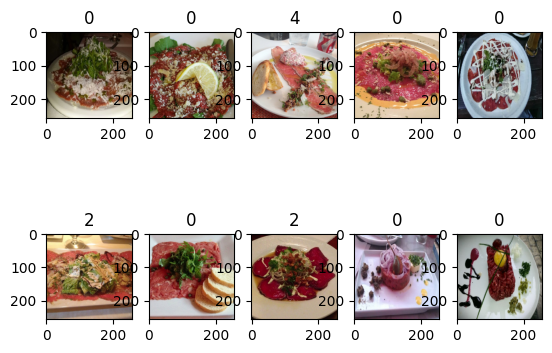

In [8]:
x, y = next(test_gen)
predictions = model.predict(test_gen)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x[i])
    plt.title(np.argmax(predictions[i]))